In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
%matplotlib inline

### Load the data

In [2]:
url = "http://www.football-data.co.uk/mmz4281/1718/E0.csv"

In [3]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("./Data/England/E0_17.csv")

In [4]:
df = pd.read_csv("./Data/England/E0_17.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2',
       'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU',
       'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [6]:
df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42
5,5,E0,12/08/17,Southampton,Swansea,0,0,D,0,0,...,1.75,19,-0.75,1.83,1.78,2.16,2.10,1.56,4.25,6.85
6,6,E0,12/08/17,Watford,Liverpool,3,3,D,2,1,...,1.99,21,1.00,1.90,1.84,2.13,2.04,6.88,4.27,1.56
7,7,E0,12/08/17,West Brom,Bournemouth,1,0,H,1,0,...,1.70,22,-0.25,2.12,2.08,1.85,1.81,2.65,3.21,3.02
8,8,E0,13/08/17,Man United,West Ham,4,0,H,1,0,...,2.16,19,-1.50,2.01,1.96,1.95,1.92,1.31,5.79,12.01
9,9,E0,13/08/17,Newcastle,Tottenham,0,2,A,0,0,...,2.01,20,0.75,2.06,2.00,1.92,1.87,4.82,3.90,1.80


### Cleaning and subsetting required data

Remove betting data as we don't need it for prediction. However, they could be good indicators of a team's current form - should try it out later.

In [7]:
res_16 = df.ix[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.ix[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.ix[:,23:]

/home/sibi/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [8]:
res_16.head()
feature_table = df.ix[:,:23]

In [9]:
res_16.tail()

,Unnamed: 0,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
125,125,Swansea,Bournemouth,0,0,D,0,0,D,S Attwell,...,9,1,5,18,6,4,5,4,2,0
126,126,Tottenham,West Brom,1,1,D,0,1,A,M Jones,...,5,5,2,10,13,8,0,1,4,0
127,127,Burnley,Arsenal,0,1,A,0,0,D,L Mason,...,17,2,2,8,14,5,5,2,0,0
128,128,Huddersfield,Man City,1,2,A,1,0,H,C Pawson,...,14,0,5,10,10,3,7,2,3,1
129,129,Southampton,Everton,4,1,H,1,1,D,K Friend,...,5,5,2,6,13,7,2,0,0,0


In [10]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [11]:
res_16 = res_16[:-10]
res_16.shape[0]

120

In [12]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.4833333333333334
Average number of goals away 1.1416666666666666
Average number of goals conceded at home 1.1416666666666666
Average number of goals conceded away 1.4833333333333334


In [13]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [14]:
# list(res_home)[0]

In [15]:
table_16.Team = res_home.HomeTeam.all().values
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,15,7,NaN,NaN,4,12,NaN,NaN
1,Bournemouth,7,4,NaN,NaN,6,8,NaN,NaN
2,Brighton,8,5,NaN,NaN,7,6,NaN,NaN
3,Burnley,5,7,NaN,NaN,2,7,NaN,NaN
4,Chelsea,9,14,NaN,NaN,6,4,NaN,NaN
5,Crystal Palace,6,0,NaN,NaN,11,13,NaN,NaN
6,Everton,8,4,NaN,NaN,12,12,NaN,NaN
7,Huddersfield,5,3,NaN,NaN,6,11,NaN,NaN
8,Leicester,8,8,NaN,NaN,8,10,NaN,NaN
9,Liverpool,12,12,NaN,NaN,1,16,NaN,NaN


In [16]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [17]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,15,7,1.685393,1.021898,4,12,0.583942,1.348315
1,Bournemouth,7,4,0.786517,0.583942,6,8,0.875912,0.898876
2,Brighton,8,5,0.898876,0.729927,7,6,1.021898,0.674157
3,Burnley,5,7,0.561798,1.021898,2,7,0.291971,0.786517
4,Chelsea,9,14,1.011236,2.043796,6,4,0.875912,0.449438
5,Crystal Palace,6,0,0.674157,0.000000,11,13,1.605839,1.460674
6,Everton,8,4,0.898876,0.583942,12,12,1.751825,1.348315
7,Huddersfield,5,3,0.561798,0.437956,6,11,0.875912,1.235955
8,Leicester,8,8,0.898876,1.167883,8,10,1.167883,1.123596
9,Liverpool,12,12,1.348315,1.751825,1,16,0.145985,1.797753


In [18]:
table_16[table_16.Team == "Swansea"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Swansea,4,3,0.449438,0.437956,10,5,1.459854,0.561798


In [19]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [20]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Arsenal,Leicester,H,10,3,1.685393,0.583942,1.167883,1.123596
1,Brighton,Man City,A,2,4,0.898876,1.021898,2.335766,0.337079
2,Chelsea,Burnley,A,6,5,1.011236,0.875912,1.021898,0.786517
3,Crystal Palace,Huddersfield,A,4,6,0.674157,1.605839,0.437956,1.235955
4,Everton,Stoke,H,4,1,0.898876,1.751825,1.021898,1.460674
5,Southampton,Swansea,D,2,0,0.674157,1.167883,0.437956,0.561798
6,Watford,Liverpool,D,4,5,0.786517,1.605839,1.751825,1.797753
7,West Brom,Bournemouth,H,6,2,0.674157,1.459854,0.583942,0.898876
8,Man United,West Ham,H,6,1,2.134831,0.145985,0.729927,1.685393
9,Newcastle,Tottenham,A,3,6,0.786517,0.729927,1.751825,0.561798


In [21]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [22]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [23]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
110,Arsenal,Tottenham,H,5,4,1.685393,0.583942,1.751825,0.561798,1
111,Bournemouth,Huddersfield,H,5,3,0.786517,0.875912,0.437956,1.235955,1
112,Burnley,Swansea,H,7,1,0.561798,0.291971,0.437956,0.561798,1
113,Crystal Palace,Everton,D,7,5,0.674157,1.605839,0.583942,1.348315,0
114,Leicester,Man City,A,0,4,0.898876,1.167883,2.335766,0.337079,-1
115,Liverpool,Southampton,H,8,0,1.348315,0.145985,0.437956,0.674157,1
116,Man United,Newcastle,H,7,5,2.134831,0.145985,0.583942,1.011236,1
117,West Brom,Chelsea,A,2,7,0.674157,1.459854,2.043796,0.449438,-1
118,Watford,West Ham,H,7,6,0.786517,1.605839,0.729927,1.685393,1
119,Brighton,Stoke,D,3,6,0.898876,1.021898,1.021898,1.460674,0


In [24]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

/home/sibi/tools/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [29]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.61538462  0.30769231  0.76923077  0.46153846  0.53846154  0.53846154
  0.41666667  0.6         0.5         0.7       ]
0.544743589744


In [30]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.46153846  0.53846154  0.69230769  0.53846154  0.46153846  0.38461538
  0.5         0.7         0.6         0.6       ]
0.547692307692


In [31]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.69230769  0.46153846  0.61538462  0.69230769  0.53846154  0.61538462
  0.66666667  0.7         0.7         0.8       ]
0.648205128205


In [32]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[ 0.53846154  0.46153846  0.76923077  0.69230769  0.53846154  0.53846154
  0.41666667  0.5         0.5         0.7       ]
0.565512820513


## Adding Recent Performance

In [33]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [34]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [35]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Stoke','Liverpool','D',0,0,0,0,0,0],
                             ['Everton','West Ham','D',0,0,0,0,0,0],
                             ['Man City','Southampton','D',0,0,0,0,0,0],
                             ['Chelsea','Swansea','D',0,0,0,0,0,0],
                             ['Arsenal','Huddersfield','D',0,0,0,0,0,0],
                             ['Bournemouth','Burnley','D',0,0,0,0,0,0],
                             ['West Brom','Newcastle','D',0,0,0,0,0,0],
                             ['Watford','Man United','D',0,0,0,0,0,0],
                             ['Leicester','Tottenham','D',0,0,0,0,0,0],
                             ['Brighton','Crystal Palace','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [36]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(130, 9)

In [37]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [38]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
129,Stoke,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
128,Everton,West Ham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
127,Man City,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
126,Chelsea,Swansea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
125,Arsenal,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
124,Bournemouth,Burnley,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
123,West Brom,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
122,Watford,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
121,Leicester,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
120,Brighton,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# for index,row in feat_table.iterrows():
#     #print row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values

In [40]:
# Adding k recent performance metrics. Change value of k.
k = 5
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.loc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

    feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
    feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
    feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
    feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
    feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
    feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

/home/sibi/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/sibi/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [41]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [42]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [44]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(130, 19)


120

In [45]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [46]:
### Try predictions here too.

# Adding home advantage

In [47]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [48]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

120


In [49]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Arsenal,Leicester,H,0.0,0.0,0.0,0.0,0.0,0.0,1.685393,0.583942,1.021898,1.348315,1,0.0,0.0,0.0
1,Brighton,Man City,A,0.0,0.0,0.0,0.0,0.0,0.0,0.898876,1.021898,0.729927,0.674157,-1,0.0,0.0,0.0
2,Chelsea,Burnley,A,0.0,0.0,0.0,0.0,0.0,0.0,1.011236,0.875912,2.043796,0.449438,-1,0.0,0.0,0.0
3,Crystal Palace,Huddersfield,A,0.0,0.0,0.0,0.0,0.0,0.0,0.674157,1.605839,0.000000,1.460674,-1,0.0,0.0,0.0
4,Everton,Stoke,H,0.0,0.0,0.0,0.0,0.0,0.0,0.898876,1.751825,0.583942,1.348315,1,0.0,0.0,0.0


In [50]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [51]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
120,-0.20,0.08,2.16,0.898876,1.021898,0.729927,0.674157
121,-0.64,0.04,2.28,0.898876,1.167883,1.167883,1.123596
122,-0.44,0.08,1.72,0.786517,1.605839,1.751825,1.123596
123,-0.56,-0.04,2.40,0.674157,1.459854,0.437956,0.898876
124,0.32,0.08,3.08,0.786517,0.875912,0.583942,0.898876
125,-0.40,0.32,1.72,1.685393,0.583942,1.021898,1.348315
126,-0.40,0.28,2.00,1.011236,0.875912,2.043796,0.449438
127,-0.64,0.56,0.84,2.696629,0.583942,2.335766,0.337079
128,-0.48,0.16,2.96,0.898876,1.751825,0.583942,1.348315
129,0.00,-0.12,2.08,0.898876,1.605839,1.021898,1.460674


In [242]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [53]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)


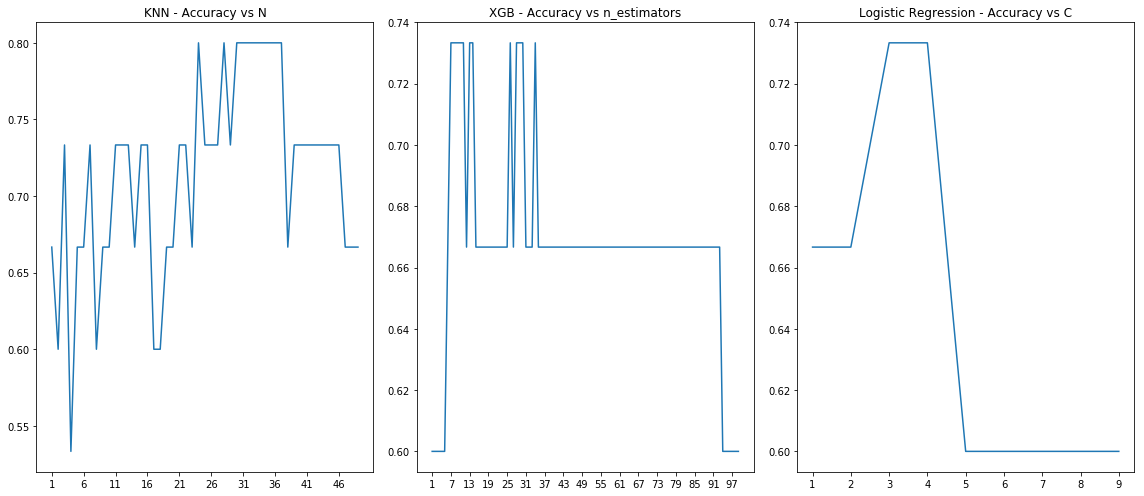

In [56]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [58]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e)

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=7
#max_logreg_ind=3



0.8 23
0.733333333333 6
0.733333333333 2


In [59]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

In [60]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [61]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [62]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
120,Brighton,Crystal Palace,-1,-1,1
121,Leicester,Tottenham,-1,-1,-1
122,Watford,Man United,-1,-1,-1
123,West Brom,Newcastle,-1,-1,-1
124,Bournemouth,Burnley,-1,0,1
125,Arsenal,Huddersfield,1,1,1
126,Chelsea,Swansea,1,-1,1
127,Man City,Southampton,1,1,1
128,Everton,West Ham,0,-1,-1
129,Stoke,Liverpool,-1,-1,-1


In [63]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [64]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [66]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.8 0.733333333333 0.733333333333


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
120,Brighton,Crystal Palace,A,A,H
121,Leicester,Tottenham,A,A,A
122,Watford,Man United,A,A,A
123,West Brom,Newcastle,A,A,A
124,Bournemouth,Burnley,A,D,H
125,Arsenal,Huddersfield,H,H,H
126,Chelsea,Swansea,H,A,H
127,Man City,Southampton,H,H,H
128,Everton,West Ham,D,A,A
129,Stoke,Liverpool,A,A,A
